# 1. Cluster the IRIS dataset using k-means algorithms.

## a. Write your own code and do not use the inbuilt functions.

In [36]:
import numpy as np
import pandas as pd
import math
import sys
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [40]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["Sepal length", "Sepal Width", "Petal Length", "Petal Width","label"])
X=data[["Sepal length", "Sepal Width", "Petal Length", "Petal Width"]].to_numpy().tolist()
Yi=data[["label"]].to_numpy()

def distance(X1,X2):
  return math.sqrt(((X1[0]-X2[0])**2)+((X1[1]-X2[1])**2)+((X1[2]-X2[2])**2)+((X1[3]-X2[3])**2))

def k_means(X,k,epochs):
  centroid=[ X[np.random.randint(0,len(X)-1)] for i in range(k)]         #this will be creating a set of initial K centroid points from different X values
  while epochs>0:
    cluster_point=[[] for _ in range(k)]                                 #this will create list of all those elements which will belong to cluster[i] i.e it is near to ith centroid hence it is in cluste[i]
    for x in X:
      dist=[]
      for j in range(len(centroid)):                                     #this will be checking out the distance of x from each centroid
        dist.append(distance(centroid[j],x))
      cluster_point[dist.index(min(dist))].append(x)                     #this will find the index of the cluster point from which x is minimum from and then append it to ith list
  
    for i in range(k):                                          
      
      centroid_avg=[0 for _ in range(len(X[0]))]                         #centroid_avg will be having the avg of all the points in the ith cluster
      # print(centroid_avg)
      for j in cluster_point[i]:
        for itr in range(len(j)):
          centroid_avg[itr]+=j[itr]

      length=len(cluster_point[i])
      # print(centroid_avg)
      if length!=0:
        # centroid_avg/=len(cluster_point[i])
        for l in range(len(centroid_avg)):
          centroid_avg[l]=centroid_avg[l]/length
           
      centroid[i]=centroid_avg  
    epochs-=1
  return centroid


def squared_sum_err(X,centroid_pos):
  err=0;
  for x in X:
    dist=[]
    for j in range(len(centroid_pos)):                                  
      dist.append(distance(centroid_pos[j],x))
    err+=min(dist)
  return err  

def elbow_method(X,epochs,min_k,max_k):
  err=[]                                                                  #this will squared sum error
  for i in range(min_k,max_k):                                            #this will iterate k value from min_k to max_k
     centroid_pos=k_means(X,i,epochs)
     err.append(squared_sum_err(X,centroid_pos))
  plt.plot(range(min_k,max_k),err)
  plt.scatter(range(min_k,max_k),err)
  plt.xlabel('Number of clusters')
  plt.ylabel('Square Sum Error')
  plt.show() 
    

# Choose the value of K using the Elbow method


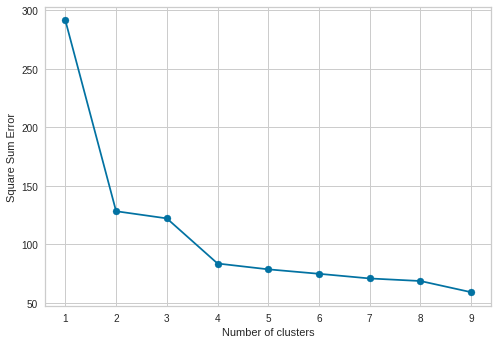

In [41]:
elbow_method(X,1000,1,10)



### The best value looking at the graph seems to be 5 since after that the graph almost remains same

# c. Repeat the experiments for k-means using library functions and verify the earlier results

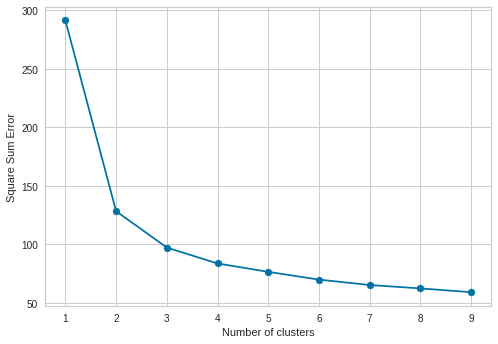

In [45]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
def elbow_using_inbuilt(X,min_k,max_k):
  err=[]
  for i in range(min_k,max_k):
    k_means = KMeans(n_clusters=i).fit(X)
    centroid_pos = k_means.cluster_centers_
    err.append(squared_sum_err(X,centroid_pos))
  plt.plot(range(min_k,max_k),err)
  plt.scatter(range(min_k,max_k),err)
  plt.xlabel('Number of clusters')
  plt.ylabel('Square Sum Error')
  plt.show()   


elbow_using_inbuilt(X,1,10)  